In [2]:
import pandas as pd 
import string
from underthesea import word_tokenize
from underthesea import pos_tag

# Positive


In [42]:
df_comment_1 = pd.read_json("Dataset\data_comments.json")

In [43]:
df_comment_1.head()

,facebookUrl,commentUrl,id,feedbackId,date,text,profilePicture,profileId,profileName,likesCount,facebookId,postTitle,pageAdLibrary,commentsCount,attachments,profileUrl
0,https://www.facebook.com/pensilia/posts/pfbid0...,https://www.facebook.com/pensilia/posts/pfbid0...,Y29tbWVudDo4MTUxMDM5ODM5OTE1MTBfMTE5ODkxNzI3OD...,ZmVlZGJhY2s6ODE1MTAzOTgzOTkxNTEwXzExOTg5MTcyNz...,2024-03-12 15:42:33+00:00,cái này hay và đẹp quá nhà Pensilia.,https://scontent.fpoa12-1.fna.fbcdn.net/v/t39....,758885537,Cuong Ta,2,815103983991510,"😭Nỗi buồn không của riêng ai! \nTóc RỤNG, tóc ...","{'is_business_page_active': True, 'id': '29166...",NaN,NaN,NaN
1,https://www.facebook.com/pensilia/posts/pfbid0...,https://www.facebook.com/pensilia/posts/pfbid0...,Y29tbWVudDo4MTUxMDM5ODM5OTE1MTBfOTM1MzgxNDQxND...,ZmVlZGJhY2s6ODE1MTAzOTgzOTkxNTEwXzkzNTM4MTQ0MT...,2024-03-11 07:51:06+00:00,trộm vía tóc nhanh dài và khỏe lắm Pen ơiii,https://scontent.fpoa12-1.fna.fbcdn.net/v/t1.3...,pfbid02S4hEJdBrzXCdK7skRSaX2PFzjKny4FGPxKZ4U36...,Yen Nhi Truong Tran,1,815103983991510,"😭Nỗi buồn không của riêng ai! \nTóc RỤNG, tóc ...","{'is_business_page_active': True, 'id': '29166...",1.0,NaN,NaN
2,https://www.facebook.com/pensilia/posts/pfbid0...,https://www.facebook.com/pensilia/posts/pfbid0...,Y29tbWVudDo4MjE5NDYyNTY2NDA2MTZfNzExMzYyNjYxMj...,ZmVlZGJhY2s6ODIxOTQ2MjU2NjQwNjE2XzcxMTM2MjY2MT...,2024-03-22 10:35:38+00:00,NaN,https://scontent.fmem1-2.fna.fbcdn.net/v/t39.3...,pfbid02FJ7zcLDfogopoXCKHFBJzT1LT5qJep1j5v1VW65...,Cherry Nguyễn,1,821946256640616,DA KHÔ DO CƠ ĐỊA CÓ KHẮC PHỤC ĐƯỢC KHÔNG? \n\n...,"{'is_business_page_active': True, 'id': '29166...",2.0,"[{'style_list': ['sticker', 'fallback']}]",https://www.facebook.com/people/Cherry-Nguy%E1...
3,https://www.facebook.com/PhongkhamPensiliaBien...,https://www.facebook.com/PhongkhamPensiliaBien...,Y29tbWVudDo2ODY2MjE0MjY4MTIxNDNfMjc4MjI4MzkxNT...,ZmVlZGJhY2s6Njg2NjIxNDI2ODEyMTQzXzI3ODIyODM5MT...,2023-07-19 03:58:02+00:00,Pensilia chi nhánh Đồng Nai: Tầng lửng TTC Pl...,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,100063928750185,Pensilia Biên Hòa,0,686621426812143,Vài góc xinh đẹp tại Pensilia chi nhánh Đồng N...,"{'id': '1702712593314057', 'woodhenge_creator_...",NaN,NaN,https://www.facebook.com/PhongkhamPensiliaBienHoa
4,https://www.facebook.com/PhongkhamPensiliaBien...,https://www.facebook.com/PhongkhamPensiliaBien...,Y29tbWVudDo2ODY2MjE0MjY4MTIxNDNfMzUzMDk3NDY1MD...,ZmVlZGJhY2s6Njg2NjIxNDI2ODEyMTQzXzM1MzA5NzQ2NT...,2023-07-22 16:02:39+00:00,Sang-xịn-mịn quá,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,pfbid0iBCtzqiQe6PRJqX2ZRym1MUu8ZwiTGDMeK3DEvSQ...,Đỗ Thị Mỹ Dung,1,686621426812143,Vài góc xinh đẹp tại Pensilia chi nhánh Đồng N...,"{'id': '1702712593314057', 'woodhenge_creator_...",NaN,NaN,https://www.facebook.com/people/%C4%90%E1%BB%9...


In [44]:
df_comment_1.dropna(subset=['text'], inplace=True)

In [45]:
df_comment_1['text']

0                   cái này hay và đẹp quá nhà Pensilia.
1            trộm vía tóc nhanh dài và khỏe lắm Pen ơiii
3      Pensilia chi nhánh Đồng Nai:  Tầng lửng TTC Pl...
4                                       Sang-xịn-mịn quá
5      Vừa được đi học vừa được làm đẹp. Sướng nha 🌸🌸...
                             ...                        
647           Quá tuyệt vời. Bs Thảo thiết trình quá hay
648                                              ❤️❤️❤️😘
650                                                    .
651    có nhoe, gặp mấy chị boos bán kem thiên nhiên,...
652                                 Bác sĩ dễ thương quá
Name: text, Length: 517, dtype: object

In [51]:
# Function for loading stopwords from a file
def load_stopwords(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        stopwords = file.readlines()
    # Remove leading and trailing whitespaces, and newline characters
    stopwords = [word.strip() for word in stopwords]
    return stopwords

# Load Vietnamese stopwords from the file
stopwords_file = "Dataset/stopwords.txt"
vietnamese_stopwords = load_stopwords(stopwords_file)

import re
fixed_words = ["Viện Nghiên Cứu", "học máy", "ko thoải mái", "k thoải mái", "vô trách nhiệm", "không hài lòng"]

def preprocess_text_vietnamese(text):
    global fixed_words
    text = str(text)
    # Lowercase
    text = text.lower()
    # Tokenization
    # Remove integers
    text = re.sub(r'\d+', '', text)
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)

    tokens = text.split(' ')
    tokens = [token for token in tokens if token not in vietnamese_stopwords]

    tokens = word_tokenize(text, format='text').split(' ')
    print(tokens)
    return tokens


In [52]:
df_comment_1['text'] = df_comment_1['text'].apply(preprocess_text_vietnamese)

['cái', 'này', 'hay', 'và', 'đẹp', 'quá', 'nhà', 'pensilia']
['trộm_vía', 'tóc', 'nhanh', 'dài', 'và', 'khỏe', 'lắm', 'pen', 'ơiii']
['pensilia', 'chi_nhánh', 'đồng_nai', 'tầng', 'lửng', 'ttc_plaza', 'võ_thị', 'sáu', 'tp', 'biên_hòa']
['sangxịnmịn', 'quá']
['vừa', 'được', 'đi', 'học', 'vừa', 'được', 'làm_đẹp', 'sướng', 'nha_hình', 'hoa', 'đào', 'đâu', 'e', 'bên', 'đó', 'đang', 'mùa', 'hoa', 'hả']
['đẹp', 'trai', 'nha']
['quá', 'chời', 'đẹp', 'rồicoi', 'chừng', 'tui']
['đẹp', 'troai', 'vãi']
['đẹp', 'quá', 'em', 'ơi']
['ội', 'xinh_đẹp', 'quá', 'đi', 'anh', 'mình', 'ơi']
['wow', 'bác', 'việt', 'cố', 'lên']
['lịch_lãm', 'phong_độ', 'bảnh_trai', 'lắm', 'cháu', 'tui', 'ơi']
['công_nghệ', 'laser', 'tia', 'được', 'fda', 'chứng_nhận', 'an_toàn', 'và', 'hiệu_quả', 'httpswwwaccessdatafdagovcdrh_docspdfkpdf']
['hình_ảnh', 'thực_tế', 'về', 'cơ_chế_hoạt_động', 'của', 'công_nghệ', 'laser', 'tia', 'httpsyoutubevdblclpm']
['vui', 'quá', 'a', 'ơi']
['clip', 'bts', 'này', 'đẹp', 'luôn', 'anh', 'ui', 'ha

In [53]:
df_comment_1['text']

0           [cái, này, hay, và, đẹp, quá, nhà, pensilia]
1      [trộm_vía, tóc, nhanh, dài, và, khỏe, lắm, pen...
3      [pensilia, chi_nhánh, đồng_nai, tầng, lửng, tt...
4                                      [sangxịnmịn, quá]
5      [vừa, được, đi, học, vừa, được, làm_đẹp, sướng...
                             ...                        
647    [quá, tuyệt_vời, bs, thảo, thiết_trình, quá, hay]
648                                                   []
650                                                   []
651    [có, nhoe, gặp, mấy, chị, boos, bán, kem, thiê...
652                             [bác_sĩ, dễ_thương, quá]
Name: text, Length: 517, dtype: object

In [54]:
# Assuming df_comment_1 is your DataFrame
# Drop rows where the 'text' column contains an empty list
df_comment_1 = df_comment_1[df_comment_1['text'].apply(lambda x: x != [])]


In [55]:
df_comment_1.shape

(517, 16)

In [56]:
df_comment_1['text']

0           [cái, này, hay, và, đẹp, quá, nhà, pensilia]
1      [trộm_vía, tóc, nhanh, dài, và, khỏe, lắm, pen...
3      [pensilia, chi_nhánh, đồng_nai, tầng, lửng, tt...
4                                      [sangxịnmịn, quá]
5      [vừa, được, đi, học, vừa, được, làm_đẹp, sướng...
                             ...                        
647    [quá, tuyệt_vời, bs, thảo, thiết_trình, quá, hay]
648                                                   []
650                                                   []
651    [có, nhoe, gặp, mấy, chị, boos, bán, kem, thiê...
652                             [bác_sĩ, dễ_thương, quá]
Name: text, Length: 517, dtype: object

In [57]:
flattened_comments = [word for comment in df_comment_1['text'] for word in comment]

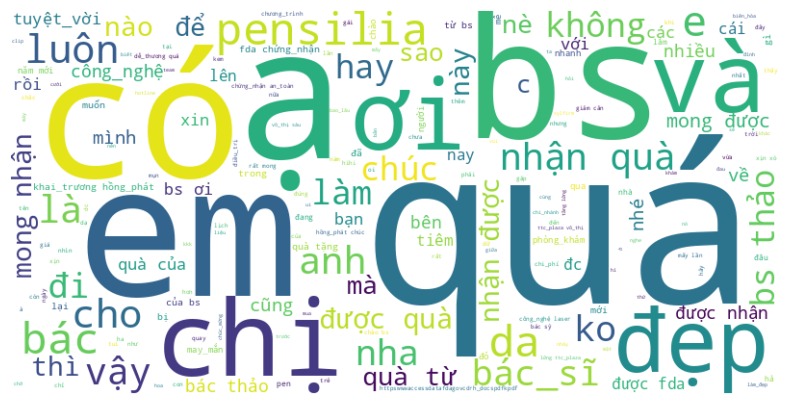

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Join the words into a single string
text = ' '.join(flattened_comments)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

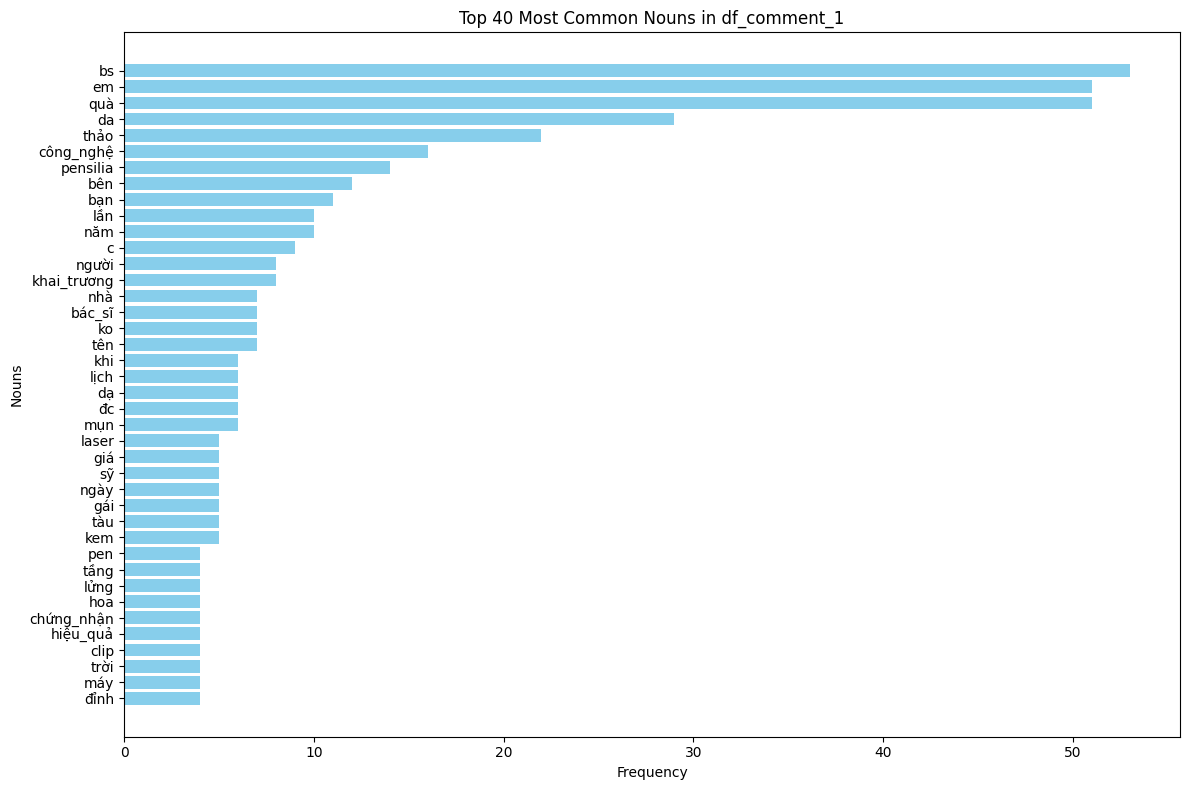

In [59]:
import matplotlib.pyplot as plt
from collections import Counter
from underthesea import pos_tag

# Function to extract nouns (N + Np) from a list of words
def extract_nouns(words):
    tags = pos_tag(' '.join(words))
    nouns = [word for word, tag in tags if tag in ['N', 'Np']]
    return nouns

# Apply the function to the 'text' column and combine all nouns into a single list
all_nouns = df_comment_1['text'].apply(extract_nouns).sum()

# Count the frequency of each noun
noun_frequency = Counter(all_nouns)

# Get the top 40 most common nouns
top_nouns = noun_frequency.most_common(40)

# Extract nouns and frequencies from the top 40 list
nouns, frequencies = zip(*top_nouns)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(nouns, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Nouns')
plt.title('Top 40 Most Common Nouns in df_comment_1')
plt.gca().invert_yaxis()  # Invert y-axis to display the most common nouns at the top
plt.tight_layout()
plt.show()


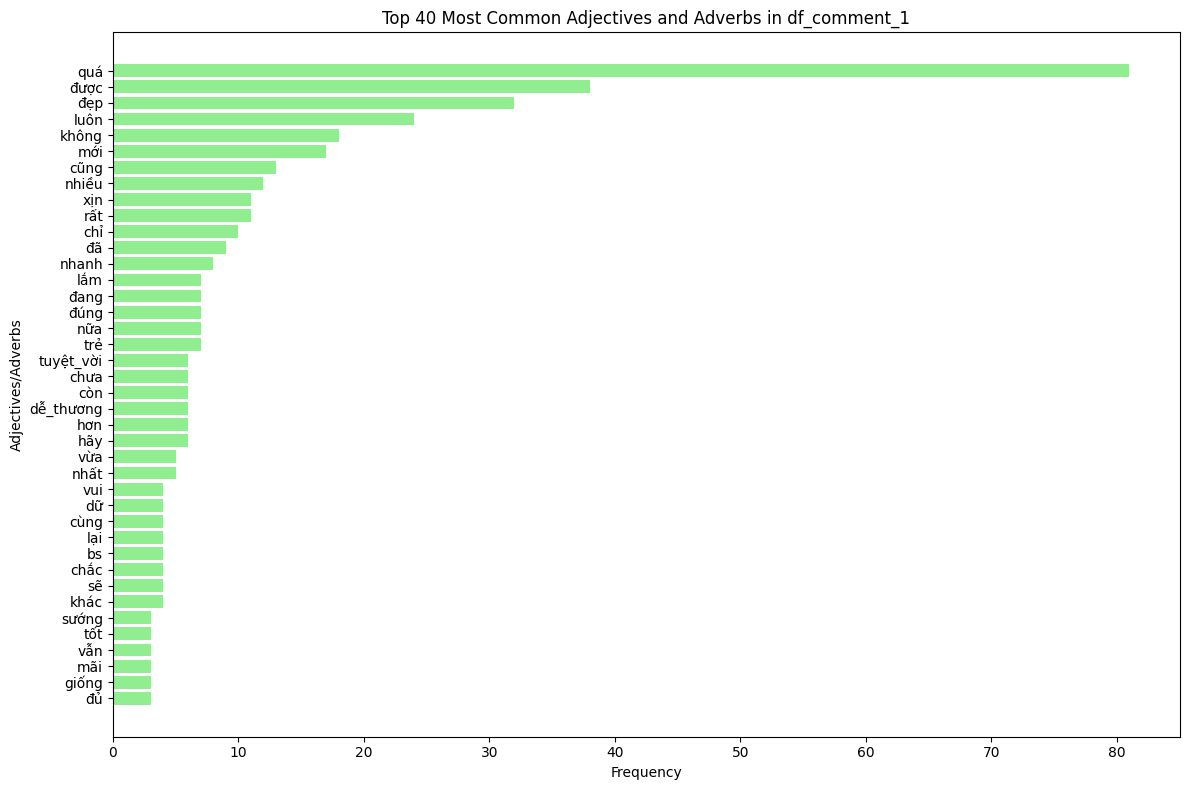

In [60]:
def extract_adj_adv(words):
    tags = pos_tag(' '.join(words))
    adj_adv = [word for word, tag in tags if tag in ['A', 'Ap', 'R']]
    return adj_adv

# Apply the function to the 'text' column and combine all adjectives/adverbs into a single list
all_adj_adv = df_comment_1['text'].apply(extract_adj_adv).sum()

# Count the frequency of each adjective/adverb
adj_adv_frequency = Counter(all_adj_adv)

# Get the top 40 most common adjectives/adverbs
top_adj_adv = adj_adv_frequency.most_common(40)

# Extract adjectives/adverbs and frequencies from the top 40 list
adj_adv_words, adj_adv_frequencies = zip(*top_adj_adv)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(adj_adv_words, adj_adv_frequencies, color='lightgreen')
plt.xlabel('Frequency')
plt.ylabel('Adjectives/Adverbs')
plt.title('Top 40 Most Common Adjectives and Adverbs in df_comment_1')
plt.gca().invert_yaxis()  # Invert y-axis to display the most common adjectives/adverbs at the top
plt.tight_layout()
plt.show()

In [61]:
filtered_nouns = [noun for noun, freq in noun_frequency.items() if freq > 5]
filtered_nouns = list(set(filtered_nouns))

In [62]:
with open('filtered_nouns.txt', 'w', encoding='utf-8') as file:
    for noun in filtered_nouns:
        file.write(noun + '\n')

In [66]:
all_adj_adv = list(set(adj_adv_words))

# Save adjectives to a file
with open('adjectives.txt', 'w', encoding='utf-8') as file:
    for adj_adv in all_adj_adv:
        file.write(adj_adv + '\n')

# Negative

In [3]:
df = pd.read_csv('Dataset/Complaints/SMA_customer_complaints.tsv', sep='\t')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ReviewContent  384 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB


In [6]:
df.describe()

,ReviewContent
count,384
unique,381
top,Ở đây khiến da mình tệ càng thêm tệ :(( mình đ...
freq,2


In [4]:
df.head()

,ReviewContent
0,Dịch vụ này thật là đáng thất vọng! Đã bỏ ra s...
1,"Lần đầu đi cũng thấy niềm nở lắm, nhưng mà nhâ..."
2,Mình được người quen giới thiệu đến khám tại p...
3,Ban đầu cũng uy tín nhưng mà giá đắt quá. Cũng...
4,Bác sĩ tư vấn như muốn lấy thêm tiền của khách...


In [ ]:
df.describe()

,ReviewContent
count,384
unique,381
top,Ở đây khiến da mình tệ càng thêm tệ :(( mình đ...
freq,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ReviewContent  384 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB


In [ ]:
df['text'] = df['ReviewContent'].apply(preprocess_text_vietnamese)

In [ ]:
flattened_comments = [word for comment in df['text'] for word in comment]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
filterd_flattened_comments = []
for word in flattened_comments: 
    if not  word == 'nan':
        filterd_flattened_comments.append(word)

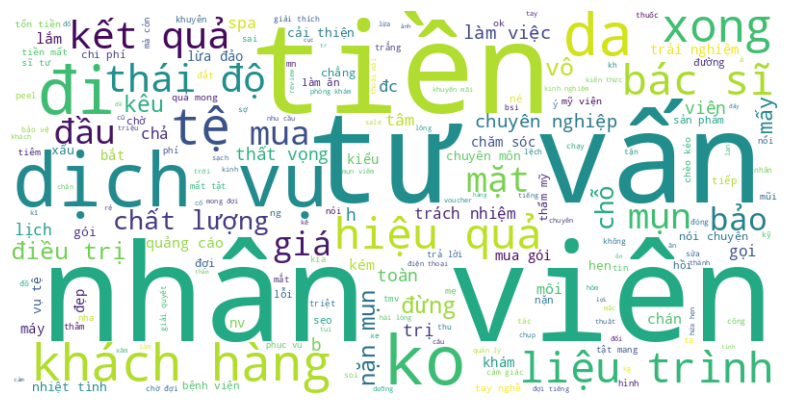

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Join the words into a single string
text = ' '.join(filterd_flattened_comments)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

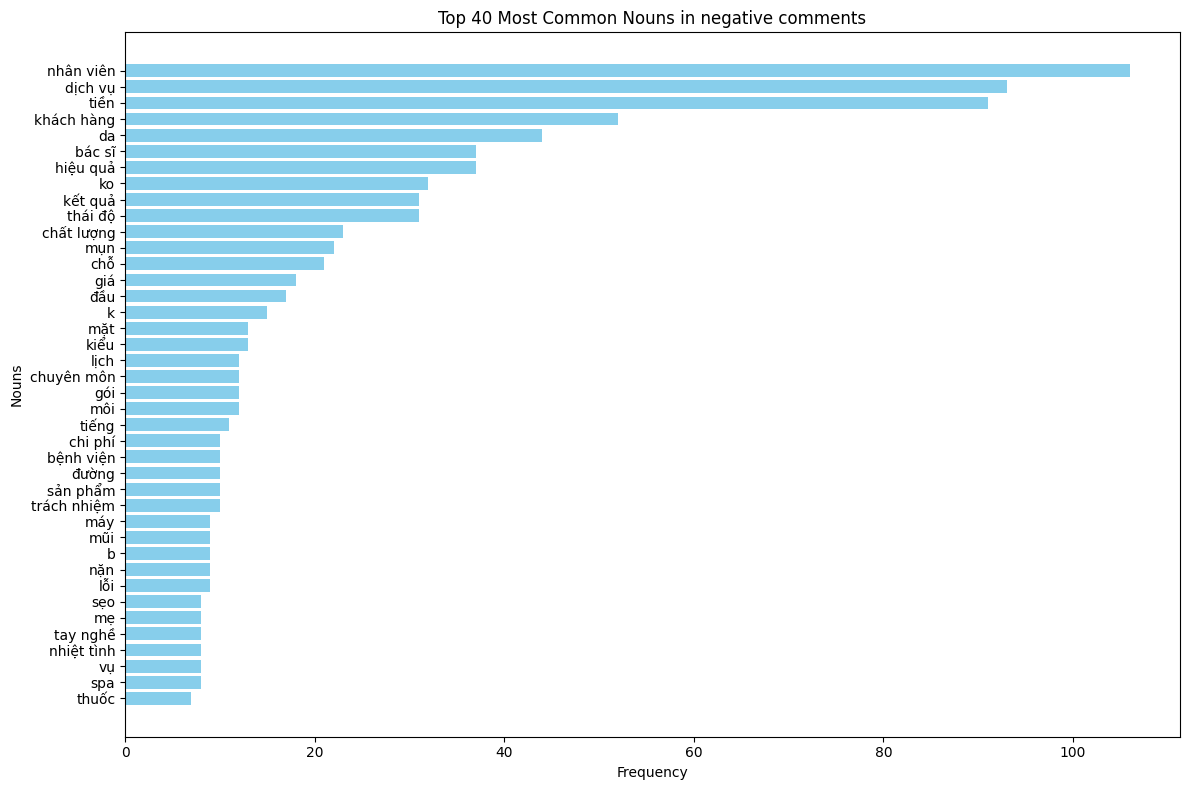

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from underthesea import pos_tag

# Function to extract nouns (N + Np) from a list of words
def extract_nouns(words):
    tags = pos_tag(' '.join(words))
    nouns = [word for word, tag in tags if tag in ['N', 'Np']]
    return nouns

# Apply the function to the 'text' column and combine all nouns into a single list
all_nouns = df['text'].apply(extract_nouns).sum()

# Count the frequency of each noun
noun_frequency = Counter(all_nouns)

# Get the top 40 most common nouns
top_nouns = noun_frequency.most_common(40)

# Extract nouns and frequencies from the top 40 list
nouns, frequencies = zip(*top_nouns)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(nouns, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Nouns')
plt.title('Top 40 Most Common Nouns in negative comments')
plt.gca().invert_yaxis()  # Invert y-axis to display the most common nouns at the top
plt.tight_layout()
plt.show()


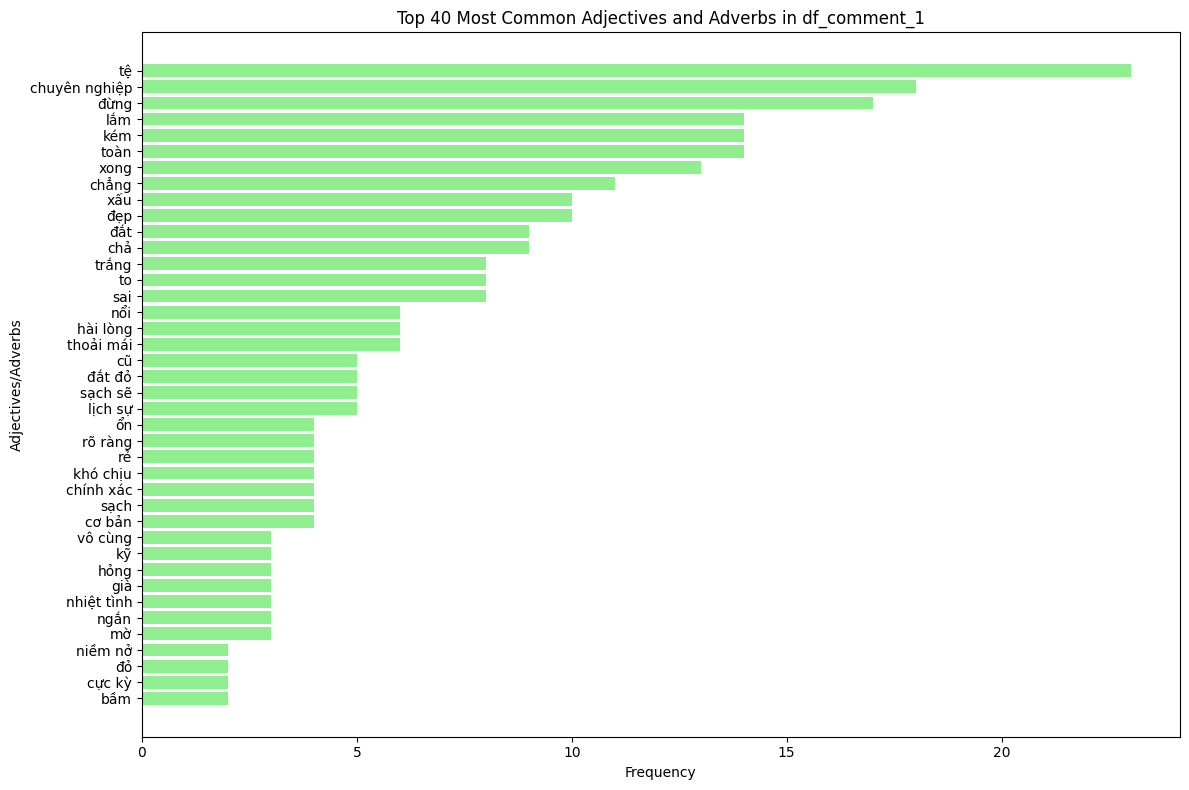

In [ ]:
def extract_adj_adv(words):
    tags = pos_tag(' '.join(words))
    adj_adv = [word for word, tag in tags if tag in ['A', 'Ap', 'R']]
    return adj_adv

# Apply the function to the 'text' column and combine all adjectives/adverbs into a single list
all_adj_adv = df['text'].apply(extract_adj_adv).sum()

# Count the frequency of each adjective/adverb
adj_adv_frequency = Counter(all_adj_adv)

# Get the top 40 most common adjectives/adverbs
top_adj_adv = adj_adv_frequency.most_common(40)

# Extract adjectives/adverbs and frequencies from the top 40 list
adj_adv_words, adj_adv_frequencies = zip(*top_adj_adv)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(adj_adv_words, adj_adv_frequencies, color='lightgreen')
plt.xlabel('Frequency')
plt.ylabel('Adjectives/Adverbs')
plt.title('Top 40 Most Common Adjectives and Adverbs in df_comment_1')
plt.gca().invert_yaxis()  # Invert y-axis to display the most common adjectives/adverbs at the top
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter
from underthesea import pos_tag
import pandas as pd

# Function to extract nouns (N + Np) and adjectives/adverbs (A + Ap) from a list of words
def extract_nouns_and_adj_adv(words):
    tags = pos_tag(' '.join(words))
    nouns = [word for word, tag in tags if tag in ['N', 'Np']]
    adj_adv = [word for word, tag in tags if tag in ['A', 'Ap']]
    return nouns, adj_adv

# Apply the function to the 'text' column
df['nouns'], df['adj_adv'] = zip(*df['text'].apply(extract_nouns_and_adj_adv))

# Combine all nouns into a single list
all_nouns = [noun for sublist in df['nouns'] for noun in sublist]

# Count the frequency of each noun
noun_frequency = Counter(all_nouns)

# Filter nouns with frequency greater than 5
filtered_nouns = list(set([noun for noun, freq in noun_frequency.items() if freq > 5]))

# Save filtered nouns to a file
with open('filtered_nouns_new.txt', 'w', encoding='utf-8') as file:
    for noun in filtered_nouns:
        file.write(noun + '\n')

# Combine all adjectives into a single list
all_adj_adv = list(set([adj_adv for sublist in df['adj_adv'] for adj_adv in sublist]))

# Save adjectives to a file
with open('adjectives_new.txt', 'w', encoding='utf-8') as file:
    for adj_adv in all_adj_adv:
        file.write(adj_adv + '\n')
